In [1]:
# HCASE_Plot_Altered_tSNE_CherryPicked_Scaffolds_Main_Text
#
# Author: Gergely Zahoranszky-Kohalmi, PhD
#
# Email: gergely.zahoranszky-kohalmi@nih.gov
#
# Organization: National Center for Advancing Translational Sciences (NCATS/NIH)
#

In [2]:
import pandas as pd

import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



import sys




In [3]:
# Config section




fname_cp_scaffolds = '../data/cherrypicked_scaffolds.tab'

fname_chembl_scaffolds_tsne_embedding = '../data/tsne_embedding_chembl_ref_scaffolds.tab'

fname_knn_drugs_alt_tsne_emb_coordinates = '../data/si_altered_tsne_knn_coords_drugs.tab'

fname_red_knn_drugs_alt_tsne_emb_coordinates = '../data/si_reduced_altered_tsne_knn_coords_drugs.tab'

fname_red_chembl_scaffolds_tsne_embedding = '../data/si_reduced_altered_tsne_embedding_cp_scaffolds.tab'



fname_out_panel_altered_tsne_plot = '../plots/tsne/main_altered_tsne_panel.png'




In [4]:
# Import datasets



df_cp_scaffolds = pd.read_csv(fname_cp_scaffolds, sep ='\t')

df_cp_emb = pd.read_csv(fname_chembl_scaffolds_tsne_embedding, sep ='\t')

df_red_cp_emb = pd.read_csv(fname_red_chembl_scaffolds_tsne_embedding, sep ='\t')


df_knn = pd.read_csv (fname_knn_drugs_alt_tsne_emb_coordinates, sep = '\t')

df_red_knn = pd.read_csv (fname_red_knn_drugs_alt_tsne_emb_coordinates, sep = '\t')


In [5]:
# Clean-up datasets


df_cp = df_cp_scaffolds.copy()

df_cp = df_cp.rename(columns = {'scaffold_id': 'id'})




In [6]:
# Functions


def panel_plot_multi_scaffolds (subfig, df, subfig_label):
    #print(df.columns)

    #print ('# OK')
    #print(df.head)
    #print(df.shape)

    # Comment this out if you want image titles.
    #plt.title (title)


    tab10_palette = ['#1179B0', '#F58C30', '#74BB5A', '#BC412C', '#795B9A', '#764A0C', '#D37DB5', '#7A7A7A', '#B8C449']
    
    #print ('# OK 2')
    
    df_1 = df[df['color'] == 1].copy()
    print(df_1.shape)
    
    
    print (df_1.head)
    
    print ('# OK 3')
    
    print (list(df_1['color'])[0])
    
    
    
    df_2 = df[df['color'] == 2].copy()
    df_3 = df[df['color'] == 3].copy()
    df_4 = df[df['color'] == 4].copy()
    df_5 = df[df['color'] == 5].copy()
    df_6 = df[df['color'] == 6].copy()
    df_7 = df[df['color'] == 7].copy()
    df_8 = df[df['color'] == 8].copy()
    df_9 = df[df['color'] == 9].copy()


    color_1 = list(df_1['color'])[0] - 1
    color_2 = list(df_2['color'])[0] - 1
    color_3 = list(df_3['color'])[0] - 1
    color_4 = list(df_4['color'])[0] - 1
    color_5 = list(df_5['color'])[0] - 1
    color_6 = list(df_6['color'])[0] - 1
    color_7 = list(df_7['color'])[0] - 1
    color_8 = list(df_8['color'])[0] - 1
    color_9 = list(df_9['color'])[0] - 1
 
    #print("color")
    #print(color_1)




    subfig.scatter(df_1['Dim_1'].values, df_1['Dim_2'].values, c = tab10_palette[color_1], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_2['Dim_1'].values, df_2['Dim_2'].values, c = tab10_palette[color_2], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_3['Dim_1'].values, df_3['Dim_2'].values, c = tab10_palette[color_3], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_4['Dim_1'].values, df_4['Dim_2'].values, c = tab10_palette[color_4], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_5['Dim_1'].values, df_5['Dim_2'].values, c = tab10_palette[color_5], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_6['Dim_1'].values, df_6['Dim_2'].values, c = tab10_palette[color_6], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_7['Dim_1'].values, df_7['Dim_2'].values, c = tab10_palette[color_7], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_8['Dim_1'].values, df_8['Dim_2'].values, c = tab10_palette[color_8], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_9['Dim_1'].values, df_9['Dim_2'].values, c = tab10_palette[color_9], alpha = 0.3, marker = 'o', s = 100)

    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=20)
    subfig.set_ylabel ('Dim 2', fontsize=20)
    


def color_scaffolds (df_coords, df_color):
    df = df_coords.merge(df_color, on = 'id', how = 'inner')
    
    return (df)



def panel_plot_multi (subfig, df_plot, subfig_title):
    #df = df [df[df['hc_order'] == hc_order]
    #df_other = df[df['knn_type'] == 'other']
    
    df = df_plot.copy()
    print (df)
 
    df_1 = df[df['knn_color'] == 1]
    df_1_parent = df_1[df_1['knn_type'] == 'parent']
    df_1_nn = df_1[df_1['knn_type'] == 'nn']

    #print (df.head)
    #print (df_knn.head)
    #df_1_nn = df_1_nn.drop(columns = ['knn_color'])
    #df_1_nn = df_1_nn.merge(df_knn, left_on = id_col, right_on = 'knn_target_id', how = 'inner')



    df_2 = df[df['knn_color'] == 2]
    df_2_parent = df_2[df_2['knn_type'] == 'parent']
    df_2_nn = df_2[df_2['knn_type'] == 'nn']

    #df_2_nn = df_2_nn.drop(columns = ['knn_color'])
    #df_2_nn = df_2_nn.merge(df_knn, left_on = id_col, right_on = 'knn_target_id', how = 'inner')



    df_3 = df[df['knn_color'] == 3]
    df_3_parent = df_3[df_3['knn_type'] == 'parent']
    df_3_nn = df_3[df_3['knn_type'] == 'nn']

    #df_3_nn = df_3_nn.drop(columns = ['knn_color'])
    #df_3_nn = df_3_nn.merge(df_knn, left_on = id_col, right_on = 'knn_target_id', how = 'inner')


    df_4 = df[df['knn_color'] == 4]
    df_4_parent = df_4[df_4['knn_type'] == 'parent']
    df_4_nn = df_4[df_4['knn_type'] == 'nn']

    #df_4_nn = df_4_nn.drop(columns = ['knn_color'])
    #df_4_nn = df_4_nn.merge(df_knn, left_on = id_col, right_on = 'knn_target_id', how = 'inner')


    df_5 = df[df['knn_color'] == 5]
    df_5_parent = df_5[df_5['knn_type'] == 'parent']
    df_5_nn = df_5[df_5['knn_type'] == 'nn']

    #df_5_nn = df_5_nn.drop(columns = ['knn_color'])
    #df_5_nn = df_5_nn.merge(df_knn, left_on = id_col, right_on = 'knn_target_id', how = 'inner')



    subfig.scatter(df_1_parent['Dim_1'].values, df_1_parent['Dim_2'].values, c = 'blue', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_1_nn['Dim_1'].values, df_1_nn['Dim_2'].values, c = 'blue', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_1_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_1_nn['Dim_1'].values[i], df_1_nn['Dim_2'].values[i])))

    subfig.scatter(df_2_parent['Dim_1'].values, df_2_parent['Dim_2'].values, c = 'green', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_2_nn['Dim_1'].values, df_2_nn['Dim_2'].values, c = 'green', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_2_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_2_nn['Dim_1'].values[i], df_2_nn['Dim_2'].values[i])))



    subfig.scatter(df_3_parent['Dim_1'].values, df_3_parent['Dim_2'].values, c = 'purple', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_3_nn['Dim_1'].values, df_3_nn['Dim_2'].values, c = 'purple', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_3_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_3_nn['Dim_1'].values[i], df_3_nn['Dim_2'].values[i])))



    subfig.scatter(df_4_parent['Dim_1'].values, df_4_parent['Dim_2'].values, c = 'orangered', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_4_nn['Dim_1'].values, df_4_nn['Dim_2'].values, c = 'orangered', alpha = 0.7, marker = '+', s = 100)


    for i, txt in enumerate(list(df_4_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_4_nn['Dim_1'].values[i], df_4_nn['Dim_2'].values[i])))



    subfig.scatter(df_5_parent['Dim_1'].values, df_5_parent['Dim_2'].values, c = 'aqua', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_5_nn['Dim_1'].values, df_5_nn['Dim_2'].values, c = 'aqua', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_5_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_5_nn['Dim_1'].values[i], df_5_nn['Dim_2'].values[i])))

    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=20)
    subfig.set_ylabel ('Dim 2', fontsize=20)
    
    
    






(101, 13)
<bound method NDFrame.head of                  id      Dim_1      Dim_2  \
0    scaffold.14825  26.457376  27.693695   
1    scaffold.14832  14.413812   2.514390   
2    scaffold.14833  26.715797  27.141481   
3    scaffold.14834  14.376759   2.447938   
4    scaffold.14837   7.740429   4.414388   
..              ...        ...        ...   
96   scaffold.37081   4.613455  26.876762   
97   scaffold.39528   6.298584   2.330233   
98   scaffold.40875  -5.144597 -13.536429   
108  scaffold.60562   6.823898   2.267492   
184  scaffold.74146 -15.146542  -1.927999   

                              structure_x  \
0                 C(=C/c1cccnc1)\c1ccccc1   
1                    c1ccc(OCc2cccnc2)cc1   
2             C(=C/c1ccc[nH+]c1)\c1ccccc1   
3                    c1ccc(OCc2ccncc2)cc1   
4                    c1ccc(CCc2cccnc2)cc1   
..                                    ...   
96            O=S(=O)(NC1=NCNCN1)c1ccccc1   
97           O=C1C=CC(=O)C(CNc2ccccc2)=C1   
98            

<Figure size 640x480 with 0 Axes>

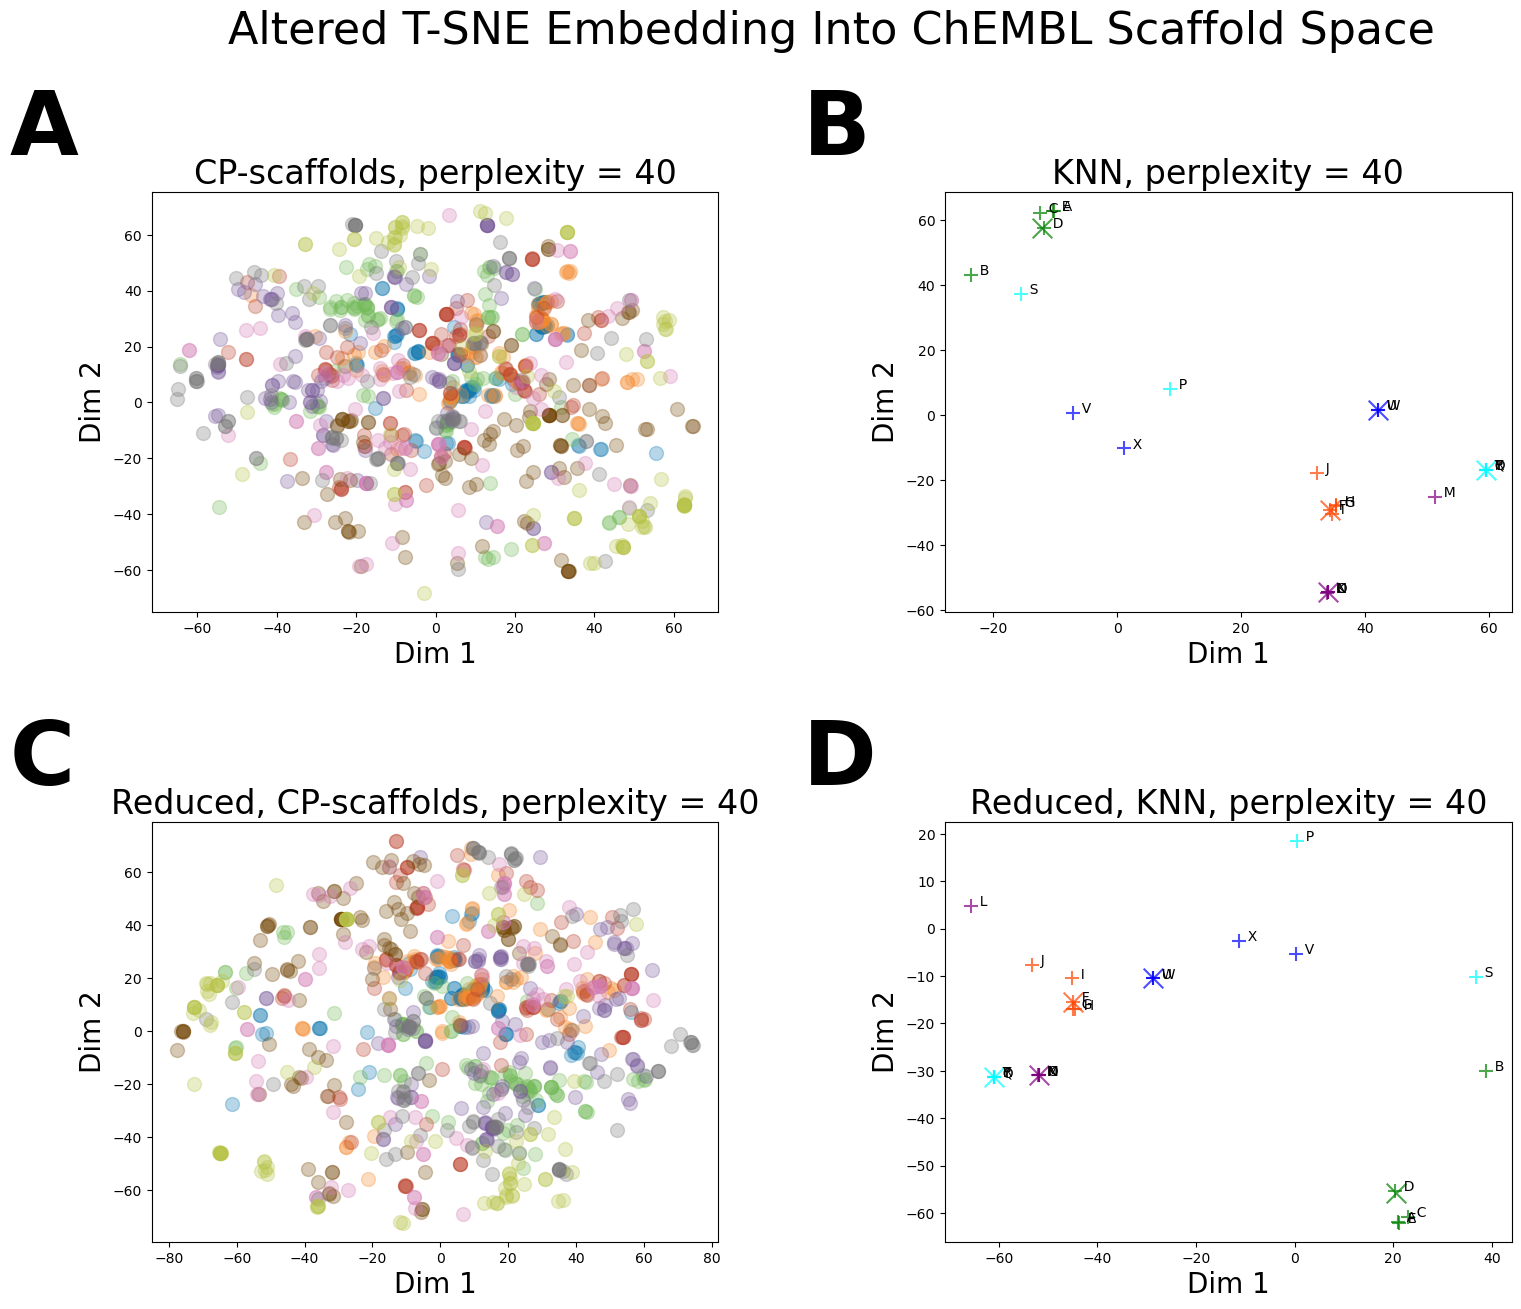

In [7]:
# Plotting
# Full data set








fig = plt.figure()

fig, subfigures = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 14))




# A: CP scaffolds (ChEMBL) in t-SNE space, per=40


df_embedded_a = df_cp_emb[df_cp_emb['perplexity'] == 40].copy()

df_colored_a = color_scaffolds(df_embedded_a, df_cp)
subfig_label = 'CP-scaffolds, perplexity = 40'
panel_plot_multi_scaffolds (subfigures[0][0], df_colored_a, subfig_label)


# B: Altered t-SNE embedding KNN in ChEMBL space, perplexity = 40

df_plot_b = df_knn[df_knn['perplexity'] == 40].copy()
    
subfig_label = 'KNN, perplexity = 40'
panel_plot_multi (subfigures[0][1], df_plot_b, subfig_label)


# C: Reduced CP ascaffolds into t-SNE, per=40


df_embedded_c = df_red_cp_emb[df_red_cp_emb['perplexity'] == 40].copy()
df_colored_c = color_scaffolds(df_embedded_c, df_cp)
subfig_label = 'Reduced, CP-scaffolds, perplexity = 40'
    
panel_plot_multi_scaffolds (subfigures[1][0], df_colored_c, subfig_label)


# D: Reduced CP ascaffolds into t-SNE, per=40

df_plot_d = df_red_knn[df_red_knn['perplexity'] == 40].copy()
    
subfig_label = 'Reduced, KNN, perplexity = 40'
panel_plot_multi (subfigures[1][1], df_plot_d, subfig_label)


   



fig.suptitle('Altered T-SNE Embedding Into ChEMBL Scaffold Space', fontsize = 32)

subfigures[0][0].text(-0.25, 1.25, "A", transform=subfigures[0][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[0][1].text(-0.25, 1.25, "B", transform=subfigures[0][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][0].text(-0.25, 1.25, "C", transform=subfigures[1][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][1].text(-0.25, 1.25, "D", transform=subfigures[1][1].transAxes,
            fontsize=64, fontweight='bold', va='top')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.5)

plt.savefig (fname_out_panel_altered_tsne_plot, dpi=300)

plt.show()



#do_analysis (df_drugs, df_knn, perplexity_val)
#do_left_out_analysis (df_drugs, df_knn, perplexity_val)



In [8]:
# References:

# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.jaccard.html#scipy.spatial.distance.jaccard
# Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
# Ref: https://sourceforge.net/p/rdkit/mailman/message/24426410/
# Ref: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/
# Ref: https://stackoverflow.com/questions/57568311/matplotlib-scatter-issue-with-python-3-x
# Ref: https://www.science-emergence.com/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
# Ref: https://www.pluralsight.com/guides/choosing-color-palettes
# Ref: https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf
# Ref: https://htmlcolorcodes.com/color-picker/
# Ref: https://stackoverflow.com/questions/46113732/modulenotfounderror-no-module-named-sklearn
# Ref: https://note.nkmk.me/en/python-numpy-ndarray-ndim-shape-size/
# Ref: ChatGPT by OpenAI [https://chat.openai.com]


